# PREDIZIONE SPESE MEDICHE

Progetto di Programmazione di Applicazioni Data Intensive a.a. 2019/20

Realizzato da: Manuel Gabrielli

manuel.gabrielli@studio.unibo.it

## Caso di Studio

- Per stabilire il costo delle spese mediche da fatturare ad una persona, una agenzia assicurativa americana vuole
  predirre spese dell'assicurazione in base ad alcune caratteristiche dell'individuo.
- Si ipotizza di avere già un dataset avente le informazioni su persone già assicurate.
- L'agenzia incrocia quindi i dati storici per indagare sul fenomeno...

## Caricamento Librerie

- Per il progetto utilizzerò le seguenti librerie
  - _NumPy_ per creare e operare su array a N dimensioni
  - _pandas_ per caricare e manipolare dati tabulari
  - _matplotlib_ per creare grafici
  - _sklearn_ per la regressione
- Importo subito tutte le librerie usando i loro alias convenzionali

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

## Estrazione dati

- Ho preso come esempio un DataSet che raccoglie informazioni su 1338 persone negli USA 
- La cella seguente scarica il DataSet se questo non è già presente nella cartella  

In [4]:
import os.path
if not os.path.exists("insurance.csv"):
    from urllib.request import urlretrieve
    urlretrieve("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv", "insurance.csv")

- Uso pandas per caricare i dati in un DataFrame dato l'URL del file

In [5]:
data = pd.read_csv("insurance.csv")

In [6]:
data.head(5)

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [7]:
data.tail(5)

age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

In [8]:
data.shape

(1338, 7)

### Descrizione dati

- `age`: età in anni del contraente assicurativo.
- `sex`: sesso del contraente assicurativo, machio o femmina.
- `bmi`: Indice di Massa Corporea. E' uno strumento importante per la misurazione del peso corretto. Il BMI mette in correlazione il peso con l’altezza: viene calcolato dividendo il peso corporeo (kg) per la statura (metri) al quadrato. Tanto più l’indice è alto, tanto più si tende al sovrappeso e aumentano i rischi per la propria salute.
- `children`: numero di figli coperti dall'assicurazione sanitaria
- `smoker`: colonna che indica se il contraente assicurativo è un fumatore
- `region`: zona residenziale del contraente assicurativo negli Stati Uniti, i valori ammessi sono nord-est, sud-est, sud-ovest, nord-ovest.
- `charges`: costi medici individuali in dollari fatturati dall'assicurazione sanitaria.

- La variabile `charges` sarà la variabile da predire. Questa è continua e quindi il problema che andrò ad analizzare sarà di Regressione.

- L'indice del DataSet è incrementale in quanto non è presente una singola colonna che individua univocamente una tupla.

##  Analisi Esplorativa

Analizzo i dati del frame `data` appena ottenuto.

In [9]:
data.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

- La riga `count`conta il numero di osservazioni non nulle.
- La riga `mean` indica la media media aritmetica dei valori presenti per ogni colonna.
- La riga `std` indica la deviazione standard, ovvero la radice quadrata della varianza, che è una misura di come le osservazioni si discostano dal loro valore atteso (media).
- La riga `min` indica il massimo dei valori nella colonna.
- Le righe `25%` `50%` `75%` indicano i percentili dei valori della colonna.
- La riga `max` indica il massimo dei valori nella colonna.

- Il fatto la riga count contiene per ogni colonna il valore uguale al numero di righe totali del DataSet sta a significare che non sono presenti valori nulli 

### Distribuzione dei dati

- Visualizzo la distribuzione delle variabili tramite istogrammi e grafici a torta:

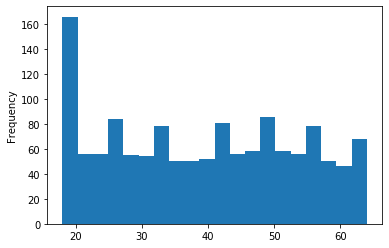

In [10]:
data["age"].plot.hist(bins=20);

- Il grafico evidenzia che l'età più comune tra i pazienti è quella che va dai 10 ai 20 anni

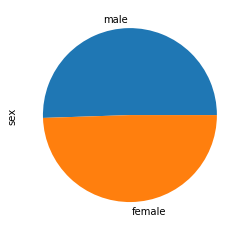

In [11]:
data["sex"].value_counts().plot.pie();

- Il grafico evidenzia che la divisone dei campioni tra maschi e femmine è equilibrata

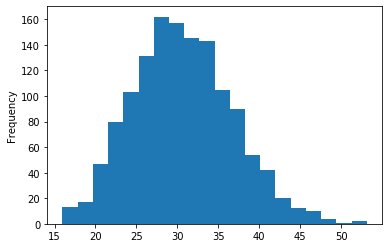

In [12]:
data["bmi"].plot.hist(bins=20);

- Il grafico evidenzia che i campioni hanno un indice di massa corporea che varia maggiormente tra i 25 e i 35 $kg/m^2$

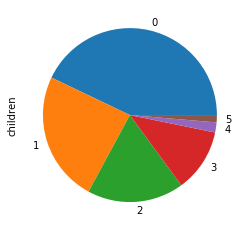

In [13]:
data["children"].value_counts().plot.pie();

- Come possiamo vedere dal grafico il valore più frequente è 0 che indica l'assenza di figli da coprire con l'assicurazione.

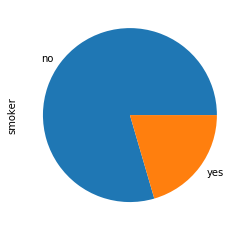

In [14]:
data["smoker"].value_counts().plot.pie();

- Come possiamo notare i valori distinti sono **si** e **no** e i non fumatori sono più del triplo dei fumatori.

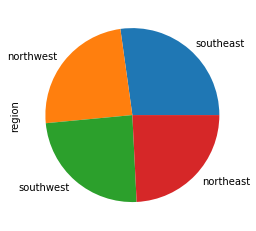

In [15]:
data["region"].value_counts().plot.pie();

- Come possiamo notare i valori distinti sono le quattro grandi macro aree dell'America ovvero **nordest**, **nordovest**, **sudest** e **nordovest**.
- La divisione dei dati tra le quattro aree è equilibrata.

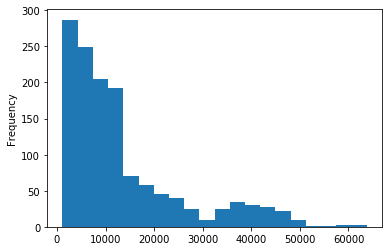

In [16]:
data["charges"].plot.hist(bins=20);

- Il grafico mostra che i valori più comuni sono quelli tra i 0 dollari e 10000. 

### Conversione dati

- Converto i dati testuali in numerici in relazione ai possibili valori che possono avere

In [17]:
data["smoker"] = data["smoker"].map(dict(yes=1, no=0)) 
#i valori yes diventano 1 e i valori no diventano 0

In [18]:
data["sex"] = data["sex"].map(dict(male=1, female=0))
#i valori male diventano 1e i valori female diventano 0

In [19]:
data["region"] = data["region"].map(dict(northeast=0, northwest=1, southeast=2, southwest=2))
#i valori northeast diventano 0, i valori northwest diventano 1, i valori southeast diventano 2 e infine i valori southwest 
#diventano 3

- Il DataSet diventa quindi:

In [20]:
data

age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       2  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       2   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]

### Grafici a dispersione

- Visualizzo i grafici a dispersione in relazione al prezzo dell'assicurazione:

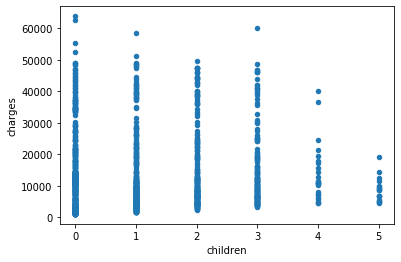

In [21]:
data.plot.scatter("children", "charges");

- Il grafico mette in luce la quasi assente correlazione tra il numero di figli e il costo dell'assicurazione. 
- Si può notare che indipendentemente dal numero di figli i valori più frequenti sono tra 0 e 10000, mentre con l'aumentare del numero i valori più alti sono sempre più rari.

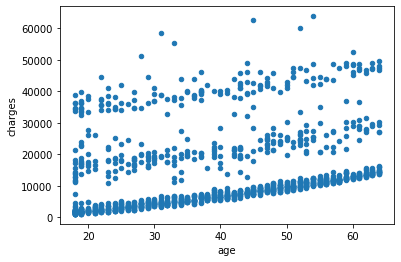

In [22]:
data.plot.scatter("age", "charges");

- Il grafico evidenzia che il costo dell'assicurazione aumenta lievemente all'aumentare dell'età.

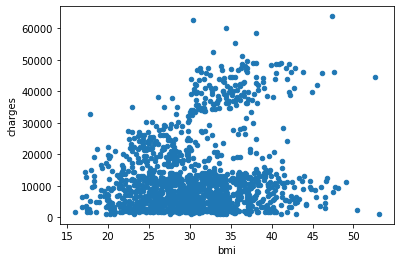

In [23]:
data.plot.scatter("bmi", "charges");

- I valori nel grafico che mette in relazione l'indice di massa corporea e il costo dell'assicurazione evidenzia che aumentando il primo aumenta anche il secondo.

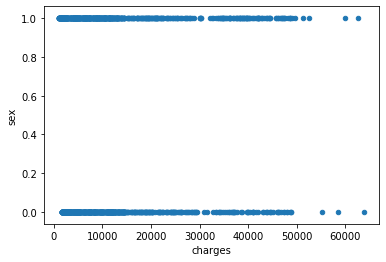

In [24]:
data.plot.scatter("charges", "sex");

- Il grafico mette in relazione il sesso della persona con il costo dell'assicurazione e i valori sono equamente distribuiti.

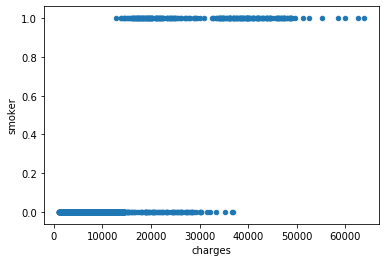

In [25]:
data.plot.scatter("charges", "smoker");

- Il grafico evidenzia la forte correlazione tra il fatto che un paziente sia fumatore o no e il costo dell'assicurazione. Infatti se il cliente non è fumatore la tariffa è più bassa.

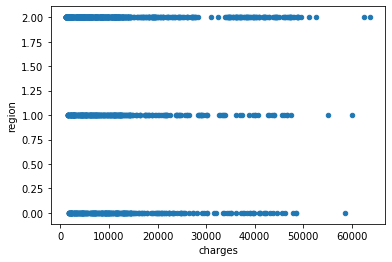

In [26]:
data.plot.scatter("charges", "region");

- Il grafico mostra la scarsa correlazione tra la regione di provenienza del cliente e il costo dell'asicurazione.

### Correlazioni tra variabili

- Il grafico a dispersione evidenzia se esiste una correlazione tra due variabili.
- Per quantificare questa correlazione bisogna utilizzare il **coefficiente di correlazione di Pearson**, un indice usato per valutare numericamente il grado di correlazione tra due variabili X e Y.
- Il suo valore è compreso tra -1 e 1
  - valori vicini a 1 indicano correlazione diretta (Y cresce al crescere di X)
  - valori vicini a -1 indicano correlazione inversa (Y descresce al crescere di X)
  - valori vicini a 0 indicano assenza di correlazione

- Estraggo ogni volta due vettori di valori dal dataFrame e gli assegno a due variabili.

- Relazione tra la variabile `children` e `charges`:

In [27]:
children = data["children"].values
charges = data["charges"].values

- Calcolo il coefficiente di correlazione di Pearson.

In [28]:
np.mean((children-children.mean()) * (charges-charges.mean())) / (children.std() * charges.std())

0.06799822684790478

- Il valore ottenuto conferma la scarsa correlazione tra le due variabili.

- Relazione tra la variabile `age` e `charges`:

In [29]:
age = data["age"].values

- Calcolo il coefficiente di correlazione di Pearson.

In [30]:
np.mean((age-age.mean()) * (charges-charges.mean())) / (age.std() * charges.std())

0.29900819333064765

- Il valore ottenuto conferma la lieve correlazione tra le due variabili.

- Relazione tra la variabile `bmi` e `charges`:

In [31]:
bmi = data["bmi"].values

- Calcolo il coefficiente di correlazione di Pearson.

In [32]:
np.mean((bmi-bmi.mean()) * (charges-charges.mean())) / (bmi.std() * charges.std())

0.19834096883362887

- Il valore ottenuto evidenzia una lieve correlazione tra le due variabili.

- Relazione tra la variabile `sex` e `charges`:

In [33]:
sex = data["sex"].values

- Calcolo il coefficiente di correlazione di Pearson.

In [34]:
np.mean((sex-sex.mean()) * (charges-charges.mean())) / (sex.std() * charges.std())

0.05729206220202535

- Il valore ottenuto evidenzia l'inesistente correlazione tra le due variabili.

- Relazione tra la variabile `smoker` e `charges`:

In [35]:
smoker = data["smoker"].values

- Calcolo il coefficiente di correlazione di Pearson.

In [36]:
np.mean((smoker-smoker.mean()) * (charges-charges.mean())) / (smoker.std() * charges.std())

0.7872514304984771

- Il valore ottenuto evidenzia la forte correlazione tra le due variabili secondo cui più decresce smoker quindi diventa 0 ovvero non fumatore più il costo decresce

- Relazione tra la variabile `region` e `charges`:

In [37]:
region = data["region"].values

- Calcolo il coefficiente di correlazione di Pearson.

In [38]:
np.mean((region-region.mean()) * (charges-charges.mean())) / (region.std() * charges.std())

0.014127935583677713

- Il valore ottenuto evidenzia la pochissima correlazione tra le due variabili.

## Binarizzazione

- Binarizzo le variabili categoriche

In [39]:
data = pd.read_csv("insurance.csv") #resetto il dataset riottenendo le variabili categoriche

data["smoker_yes"] = data["smoker"].map(dict(yes=1, no=0)) 
data["smoker_no"] = data["smoker"].map(dict(yes=0, no=1))
data = data.drop(columns="smoker")

data["region_northeast"] = data["region"].map(dict(northeast=1, northwest=0, southeast=0, southwest=0))
data["region_southheast"] = data["region"].map(dict(northeast=0, northwest=0, southeast=1, southwest=0))
data["region_northwest"] = data["region"].map(dict(northeast=0, northwest=1, southeast=0, southwest=0))
data["region_southwest"] = data["region"].map(dict(northeast=0, northwest=0, southeast=0, southwest=1))
data = data.drop(columns="region")

data["sex_male"] = data["sex"].map(dict(male=1, female=0))
data["sex_female"] = data["sex"].map(dict(male=0, female=1))
data = data.drop(columns="sex")

data

age     bmi  children      charges  smoker_yes  smoker_no  \
0      19  27.900         0  16884.92400           1          0   
1      18  33.770         1   1725.55230           0          1   
2      28  33.000         3   4449.46200           0          1   
3      33  22.705         0  21984.47061           0          1   
4      32  28.880         0   3866.85520           0          1   
...   ...     ...       ...          ...         ...        ...   
1333   50  30.970         3  10600.54830           0          1   
1334   18  31.920         0   2205.98080           0          1   
1335   18  36.850         0   1629.83350           0          1   
1336   21  25.800         0   2007.94500           0          1   
1337   61  29.070         0  29141.36030           1          0   

      region_northeast  region_southheast  region_northwest  region_southwest  \
0                    0                  0                 0                 1   
1                    0                  1                 0                 0   
2                    0                  1                 0                 0   
3                    0                  0                 1                 0   
4                    0                  0                 1                 0   
...                ...                ...               ...               ...   
1333                 0                  0                 1                 0   
1334                 1                  0                 0                 0   
1335                 0                  1                 0                 0   
1336                 0                  0                 0                 1   
1337                 0                  0                 1                 0   

      sex_male  sex_female  
0            0           1  
1            1           0  
2            1           0  
3            1           0  
4            1           0  
...        ...         ...  
1333         1           0  
1334         0           1  
1335         0           1  
1336         0           1  
1337         0           1  

[1338 rows x 12 columns]

## Divisione tra training e validation set

- Divido i dati caricati casualmente in
  - un _training set_ per addestrare i modelli
  - un _validation set_ per verificare l'accuratezza del modello

- Estraggo dal frame
    - la serie y con i valori della variabile `charges` da prevedere
    - il frame X con i valori di tutte le altre variabili, utilizzabili per la predizione

In [40]:
y = data["charges"]
X = data.drop(columns="charges")

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = \
    train_test_split(X, y, test_size=1/3, random_state=42)

## Errori

- Inserisco funzioni utili per il calcolo dell'**errore relativo**, del **mean squared error** e del **coefficiente di determinazione $R^2$**.

- Il **mean squared error** misura l'errore che compie il modello durante la predizione di dati sconosciuti.
- L'**errore relativo** è utilizzato per confrontare diversi modelli addestrati sugli stessi dati. Indica di quanto il modello si sbaglia in percentuale rispetto al valore reale
- Il **coefficiente $R^2$** misura quanto il modello cattura la variabilità presente dei dati. Deve essere il più possibile vicino a 1.

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

# definisco funzione per errore relativo
def relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

# funzione per calcolare e stampare tutte e tre
def print_eval(X, y, model):
    preds = model.predict(X)
    print("   Mean squared error: {:.5}".format(mean_squared_error(y, preds)))
    print("       Relative error: {:.5%}".format(relative_error(y, preds)))
    print("R-squared coefficient: {:.5}".format(r2_score(y, preds)))

## Normalizzazione dati

I valori dei dati della colonna numeriche potrebbero essere molto lontani l'uno dall'altro. Questo a volte può portare a situazioni indesiderabili negli algoritmi di regressione. Pertanto, normalizzo i dati, portanto i dati di ciascuna colonna compresi tra 0 e 1.

In [43]:
data["bmi"] = (data["bmi"] - np.min(data["bmi"]))/(np.max(data["bmi"]) - np.min(data["bmi"]))
data["charges"] = (data["charges"] - np.min(data["charges"]))/(np.max(data["charges"]) - np.min(data["charges"]))
data["age"] = (data["age"] - np.min(data["age"]))/(np.max(data["age"]) - np.min(data["age"]))
data

age       bmi  children   charges  smoker_yes  smoker_no  \
0     0.021739  0.321227         0  0.251611           1          0   
1     0.000000  0.479150         1  0.009636           0          1   
2     0.217391  0.458434         3  0.053115           0          1   
3     0.326087  0.181464         0  0.333010           0          1   
4     0.304348  0.347592         0  0.043816           0          1   
...        ...       ...       ...       ...         ...        ...   
1333  0.695652  0.403820         3  0.151299           0          1   
1334  0.000000  0.429379         0  0.017305           0          1   
1335  0.000000  0.562012         0  0.008108           0          1   
1336  0.065217  0.264730         0  0.014144           0          1   
1337  0.934783  0.352704         0  0.447249           1          0   

      region_northeast  region_southheast  region_northwest  region_southwest  \
0                    0                  0                 0                 1   
1                    0                  1                 0                 0   
2                    0                  1                 0                 0   
3                    0                  0                 1                 0   
4                    0                  0                 1                 0   
...                ...                ...               ...               ...   
1333                 0                  0                 1                 0   
1334                 1                  0                 0                 0   
1335                 0                  1                 0                 0   
1336                 0                  0                 0                 1   
1337                 0                  0                 1                 0   

      sex_male  sex_female  
0            0           1  
1            1           0  
2            1           0  
3            1           0  
4            1           0  
...        ...         ...  
1333         1           0  
1334         0           1  
1335         0           1  
1336         0           1  
1337         0           1  

[1338 rows x 12 columns]

## Regressione Lineare

- La regressione lineare è un modello semplice ma spesso abbastanza efficace per ricavare modelli di predizione

- Dapprima creo un modello vuoto poi passo i dati suddivisi precedentemente con il metodo _fit_ per allenare il modello di regressioneì

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
model = LinearRegression()
model.fit(X_train, y_train) #passo i dati di training

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Infine valuto il modello sui dati di test richiamando il metodo _print_eval_ che stampa a video i risultati.

In [46]:
print_eval(X_val, y_val, model)

   Mean squared error: 3.4966e+07
       Relative error: 43.39944%
R-squared coefficient: 0.76504


- Il modello ritorna un valore di $R^2$ del 76% perciò si adatta ai dati abbastanza bene, però possiamo ancora migliorare le performance utilizzando tecniche differenti in quanto l'errore relativo è molto alto.

- Ora posso ottenere i coefficienti angolari utilizzati dal modello e creare una serie per associare ad ogni coefficente il nome della variabile corrispondente.

In [47]:
pd.Series(model.coef_, index=data.columns[:-1])

age                    261.224369
bmi                    345.965818
children               367.796338
charges              11815.029926
smoker_yes          -11815.029926
smoker_no              519.927659
region_northeast      -362.843165
region_southheast      150.346543
region_northwest      -307.431037
region_southwest        60.438708
sex_male               -60.438708
dtype: float64

- Il coefficiente angolare rappresenta la variazione subita in media dalla variabile `charges` per effetto di un aumento unitario della variabile in questione

## Cross validation k fold
- Divido i dati causalmente in k gruppi e ognuno lo valido su un modello addestrato su tutti gli altri gruppi.
- Questo viene automatizzato dalla funzione _cross_validate_ di scikit-learn.
- Il risultato è un dizionario con un vettore per ciascuna misura estratta, ciascuno ha un valore per ogni fold.
- Per valutare la bontà generale del modello, guardo la media e deviazione standard degli score.


In [48]:
from sklearn.model_selection import KFold, cross_validate

kf = KFold(5, shuffle=True, random_state=42)

## Grid search

- L'accuratezza del modello può dipendere fortemente dagli iperparametri.
- Bisogna cercare gli iperparametri che massimizzano l'accuratezza.
- Utilizzo un dizionario in cui inserisco la griglia di parametri che devo trovare.
- Il modello finale è accessibile all'attributo _gs_best_estimator_, mentre con l'attributo _best_params_ ottengo i valori migliori degli iperparametri. 

- Creo una funzione che, preso un modello e una griglia contenente i parametri da passare, calcola l'accuratezza del modello applicando l'algoritmo di grid search con cross validation e stampa a video i risultati.

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
def grid_search(model, grid):
    gs = GridSearchCV(model, grid, cv=kf)
    gs.fit(X_train, y_train)
    print("Iperparametri migliori:")
    print(gs.best_params_)
    print_eval(X_val, y_val, gs)
    return gs;

## Regressione Polinomiale

- La regressione polinomiale è una generalizzazione di quella lineare in cui il modello include termini di grado superiore.
- Standardizzo i dati perchè in presenza di più variabili con scale diverse, applicare la standardizzazione a ciascuna di esse è utile per uniformarne i valori.

- Utilizzo una Pipeline.

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [52]:
poly_model = Pipeline([
    # nome     elemento
    ("poly",   PolynomialFeatures(include_bias=False)), #grado 2
    ("linreg", LinearRegression())
])
grid_poly = {
    "poly__degree": range(2, 6),
}

- Ora posso richiamare le stesse operazioni del modello linare in quanto la trasformazione avviene in automatico.

- Valuto il modello.

In [53]:
gs = grid_search(poly_model, grid_poly)

Iperparametri migliori:
{'poly__degree': 2}
   Mean squared error: 2.166e+07
       Relative error: 28.95865%
R-squared coefficient: 0.85445


C:\Users\utente\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


- Come possiamo notare il modello è molto migliorato rispetto la Regressione Lineare.

## Regressione Ridge

- Per eseguire la regressione ridge uso il modello `Ridge`.
- $\alpha$ è l'iperparametro che controlla il peso della regolarizzazione.

In [54]:
from sklearn.linear_model import Ridge

In [55]:
ridge_model = Pipeline([
    ("poly",   PolynomialFeatures(include_bias=False)),
    ("scale",  StandardScaler()),
    ("linreg", Ridge())
])
grid_ridge = {
    "poly__degree": range(2, 5),
    "linreg__alpha": [0.1, 1, 2, 3, 4],
}

- Verifico l'accuratezza.

In [56]:
gs = grid_search(ridge_model, grid_ridge)

Iperparametri migliori:
{'linreg__alpha': 1, 'poly__degree': 2}
   Mean squared error: 2.169e+07
       Relative error: 28.76688%
R-squared coefficient: 0.85425


## Regressione Lasso

- Con la regressione Lasso addestro un modello ignorando completamente le variabili meno rilevanti.
- Come per la regressione ridge, il parametro $\alpha$ controlla il peso della regolarizzazione

In [57]:
from sklearn.linear_model import Lasso

In [58]:
lasso_model = Pipeline([
    ("scale", StandardScaler()),
    ("regr", Lasso())
])
grid_lasso = {
    #"regr__alpha": [0.1, 1, 2, 3, 4, 10]
    "regr__alpha": [0.1]
}

- Valuto il modello.

In [59]:
gs = grid_search(lasso_model, grid_lasso)

Iperparametri migliori:
{'regr__alpha': 0.1}
   Mean squared error: 3.4966e+07
       Relative error: 43.39947%
R-squared coefficient: 0.76504


In [60]:
lasso = pd.Series(gs.best_estimator_.named_steps["regr"].coef_, X.columns).sort_values()
lasso

region_southheast   -8.898088e+01
region_southwest    -6.282400e+01
smoker_no           -7.729478e-12
sex_female          -5.791083e-14
sex_male             6.033162e+01
region_northwest     1.342286e+02
region_northeast     2.964504e+02
children             4.434043e+02
bmi                  2.071728e+03
age                  3.714011e+03
smoker_yes           9.599621e+03
dtype: float64

- Ottengo un'accuratezza peggiore rispetto ai modelli precedenti.

- Nessuna feture è stata azzerata.

## Regressione Elastic Net 

- Combina la regolarizzazione Ridge e la Lasso

In [61]:
from sklearn.linear_model import ElasticNet

In [62]:
elastic_model = Pipeline([
    ("scale",  StandardScaler()),
    ("regr", ElasticNet())
])
grid_elastic = {
    "regr__alpha": [0.1, 1, 10],
    "regr__l1_ratio": [0.1, 0.25, 0.5]
}

- Verifico l'accuratezza.

In [63]:
gs = grid_search(elastic_model, grid_elastic)

Iperparametri migliori:
{'regr__alpha': 0.1, 'regr__l1_ratio': 0.5}
   Mean squared error: 3.5107e+07
       Relative error: 44.32193%
R-squared coefficient: 0.7641


## Regressione con funzioni Kernel

- Utilizzo le funzioni Kernel perchè mi permettono di ottenere modelli non lineari senza l'aggiunta di variabili.

In [64]:
from sklearn.kernel_ridge import KernelRidge

In [65]:
kernel_model = Pipeline([
    ("scale", StandardScaler()),
    ("regr",  KernelRidge(kernel="poly"))
])
grid_kernel = {
    "regr__degree": range(2, 11),
    "regr__alpha": [0.01, 0.1, 1, 10],
}

- Verifico l'accuratezza

In [66]:
gs = grid_search(kernel_model, grid_kernel)

Iperparametri migliori:
{'regr__alpha': 1, 'regr__degree': 2}
   Mean squared error: 2.1665e+07
       Relative error: 28.99350%
R-squared coefficient: 0.85442


C:\Users\utente\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


- Ho ottenuto un'accuratezza più elevata rispetto ai modelli lineari, ma in tempi molto più brevi rispetto alla regressione polinomiale.

## Valutazione dei modelli migliori

- Vado ora a valutare con più attenzione i modelli che ho individuato. Scelgo il modello Ridge ed il modello con regressione con funzione Kernel " _poly_ " che ci hanno dato i risultati migliori.

- Addestro i modelli sulla totalità dei dati.

In [67]:
ridge = Pipeline([
    ("poly",   PolynomialFeatures(degree=2, include_bias=False)),
    ("scale",  StandardScaler()),
    ("linreg", Ridge(alpha=0.1))
])
ridge.fit(X_train, y_train);

kernel = Pipeline([
    ("scale", StandardScaler()),
    ("regr",  KernelRidge(alpha=1, kernel="poly", degree=2))
])
kernel.fit(X_train, y_train);

- Valuto i due modelli.

In [68]:
print("Ridge model Train")
print_eval(X_train, y_train, ridge)
print("--------------------------------")
print("Ridge model Val")
print_eval(X_val, y_val, ridge)
print("================================")
print("Kernel model Train")
print_eval(X_train, y_train, kernel)
print("--------------------------------")
print("Kernel model Val")
print_eval(X_val, y_val, kernel)

Ridge model Train
   Mean squared error: 2.306e+07
       Relative error: 28.81526%
R-squared coefficient: 0.84139
--------------------------------
Ridge model Val
   Mean squared error: 2.1662e+07
       Relative error: 28.93555%
R-squared coefficient: 0.85444
Kernel model Train
   Mean squared error: 2.3089e+07
       Relative error: 28.73485%
R-squared coefficient: 0.84119
--------------------------------
Kernel model Val
   Mean squared error: 2.1665e+07
       Relative error: 28.99350%
R-squared coefficient: 0.85442


- I modelli sono quasi identici.

- Creo una funzione per calcolare l'intervallo di confidenza predittivo con confidenza del 95%.

In [69]:
def differenza_tra_modelli(error1, error2):
    z = 1.96 #confidenza 95%
    varianza = (((1 - error1) * error1) / len(y_val)) + (((1 - error2) * error2) / len(y_val))
    d_min = abs(error1 - error2) - z * (pow(varianza, 0.5)) #radice
    d_max = abs(error1 - error2) + z * (pow(varianza, 0.5))
    print("Valore minimo: {}\nValore massimo: {}\n".format(d_min, d_max))

- Calcolo la differenza tra i due modelli.

In [70]:
error_ridge = 1 - r2_score(y_val, ridge.predict(X_val))

error_kernel = 1 - r2_score(y_val, kernel.predict(X_val))

differenza_tra_modelli(error_ridge, error_kernel)

Valore minimo: -0.0462688829119087
Valore massimo: 0.04630904029019625



- Siccome lo 0 appartiene all'intervallo compreso tra il valore minimo e massimo si ha che la differenza tra i 2 modelli non è statisticamente significativa.

- Scelgo il modello Ridge perchè ha uno scarto quadratico medio e un errore relativo leggermente minore.

## Interpretazione della conoscenza appresa dal modello

- Estrapolo i coefficienti.

In [71]:
coefs = pd.Series(ridge.named_steps["linreg"].coef_, ridge.named_steps["poly"].get_feature_names())
coefs_orded = coefs
coefs_orded.sort_values()

x1 x4    -8077.792871
x1^2     -2258.828360
x3       -1298.810331
x3^2     -1298.810331
x3 x9     -882.823664
             ...     
x4        1298.810331
x1 x5     1485.404077
x0^2      4429.478338
x1        4942.944153
x1 x3    10987.985741
Length: 77, dtype: float64

- Per quel che riguarda i valori negativi sono tendenzialmente più bassi rispetto a quelli positivi, segno che probabilmente sono più le features che alzano il prezzo dell'assicurazione.

In [72]:
coefs = pd.Series((ridge.named_steps["linreg"].coef_).flat[0:11], X.columns).sort_values()
coefs

smoker_yes          -1298.810331
age                  -724.672684
sex_male             -122.913565
region_northwest     -102.040446
region_northeast      -72.979072
region_southwest       55.245029
children              119.423138
region_southheast     120.861463
sex_female            122.913565
smoker_no            1298.810331
bmi                  4942.944153
dtype: float64

- Ottengo che le features più correlate sono `smoker` e `bmi`, ovvero sono le variabili che più influiscono sul prezzo dell'assicurazione.

- Il modello ha ottenuto un'accuratezza buona, intorno al 85%.

In [74]:
y_preds = ridge.predict(X_val)
y_val1 = pd.DataFrame(y_val.values, columns=['real_charges'])
preds1 = pd.DataFrame(y_preds, columns=['estimated_charges'])
ynew = pd.concat([y_val1, preds1], axis=1)
ynew

real_charges  estimated_charges
0      9095.06825       10967.209130
1      5272.17580        5919.109207
2     29330.98315       32761.345508
3      9301.89355       10910.262543
4     33750.29180       29443.498439
..            ...                ...
441    1824.28540        3827.455849
442    7325.04820        8712.799767
443   40103.89000       38810.133760
444   39725.51805       32218.301797
445    1748.77400        2762.659803

[446 rows x 2 columns]